In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
encoded_df = pd.read_csv("TCGA_InfoWithGrade.csv")
non_encoded_df = pd.read_csv("TCGA_GBM_LGG_Mutations_all.csv")

In [4]:
non_encoded_df.head()

,Unnamed: 0.1,Unnamed: 0,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,LGG,Male,51,"Oligodendroglioma, NOS",MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,1,LGG,Male,38,Mixed glioma,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,2,2,LGG,Male,35,"Astrocytoma, NOS",MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,3,LGG,Female,32,"Astrocytoma, anaplastic",MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,4,4,LGG,Male,31,"Astrocytoma, anaplastic",MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [5]:
print(encoded_df.shape,non_encoded_df.shape)

(839, 25) (839, 26)


In [6]:
non_encoded_df.replace("--", np.nan, inplace=True)
non_encoded_df.replace("not reported", np.nan, inplace=True)

In [7]:
non_encoded_df.isna().sum()
non_encoded_df = non_encoded_df.dropna()
non_encoded_df.shape

(839, 26)

In [8]:
non_encoded_df["Age_at_diagnosis"] = non_encoded_df["Age_at_diagnosis"].str.split(' ').str[0]
non_encoded_df.head()

AttributeError: Can only use .str accessor with string values!

In [9]:
# Convert Age_at_diagnosis to numeric (if not already)
non_encoded_df['Age_at_diagnosis'] = pd.to_numeric(non_encoded_df['Age_at_diagnosis'], errors='coerce')

# Calculate the median age for each diagnosis
median_ages = non_encoded_df.groupby('Primary_Diagnosis')['Age_at_diagnosis'].median().sort_values()

# Create a categorical type for Primary_Diagnosis ordered by median age
ordered_categories = median_ages.index
non_encoded_df['Primary_Diagnosis'] = pd.Categorical(non_encoded_df['Primary_Diagnosis'], categories=ordered_categories, ordered=True)

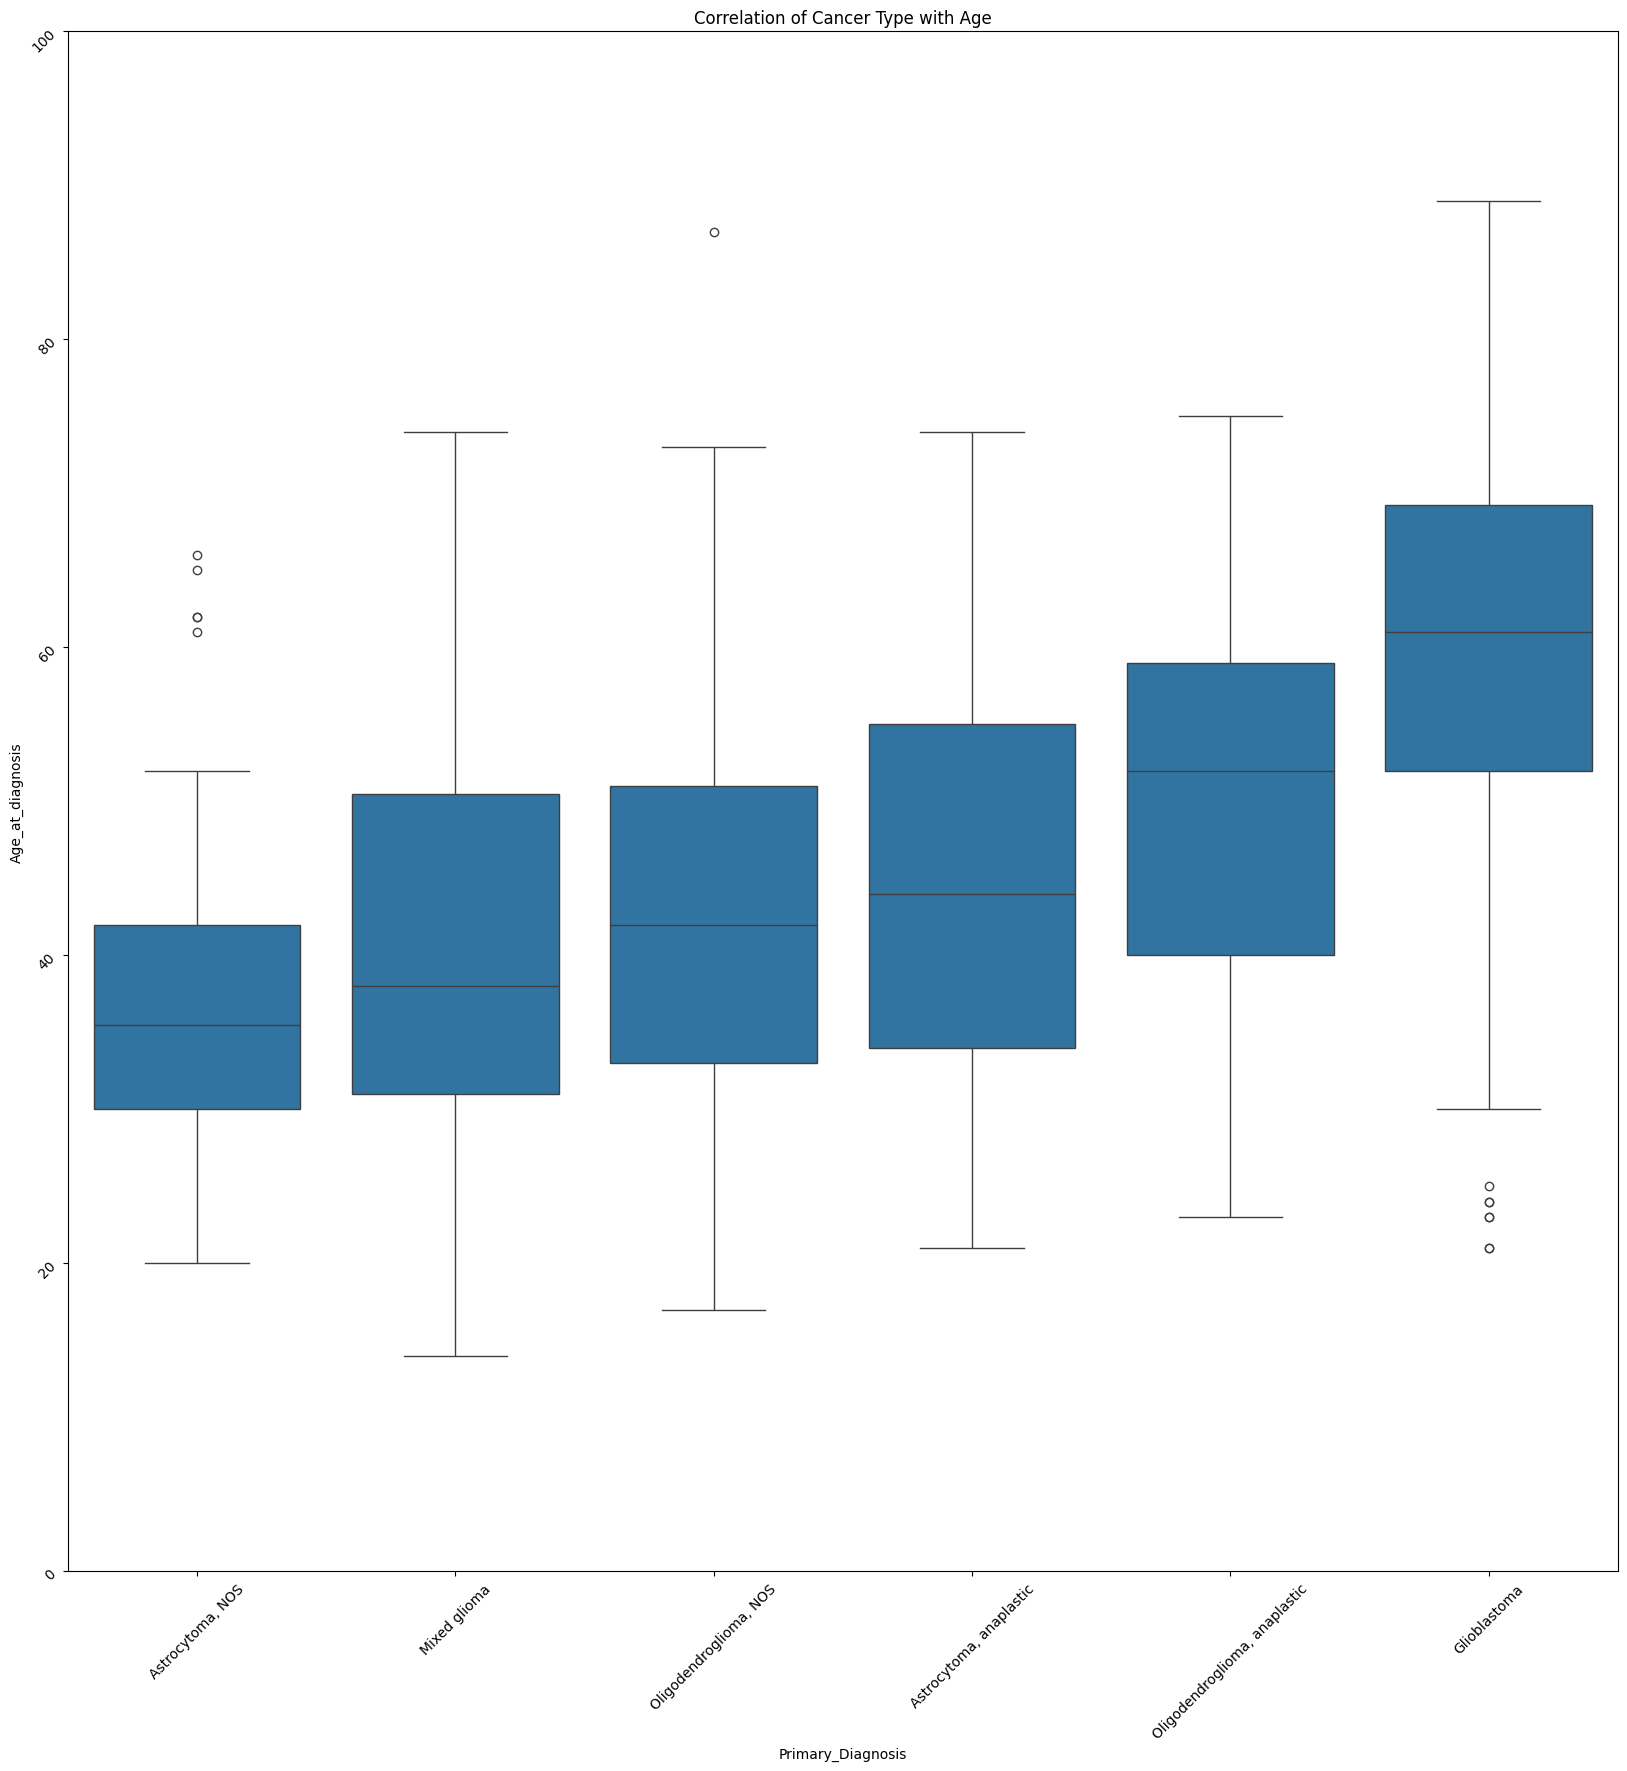

In [12]:
plt.figure(figsize=(20, 20))

sns.boxplot(x=non_encoded_df["Primary_Diagnosis"], y=non_encoded_df["Age_at_diagnosis"])
plt.title("Correlation of Cancer Type with Age")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0, 100)
plt.show()

In [75]:
encoded_df.isnull().sum()

Unnamed: 0           0
Grade                0
Gender               0
Age_at_diagnosis     0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
Primary Diagnosis    0
dtype: int64

In [76]:
non_encoded_df.isnull().sum()

Unnamed: 0           0
Grade                0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

In [ ]:
# Now, we will drop the race column due to race not having any influence on the genetic markers of the patients, which was proven by the Human
# Genome Project.
non_encoded_df = non_encoded_df.drop("Race",axis=1)
encoded_df = encoded_df.drop("Race", axis=1)

In [78]:
non_encoded_df.head()

,Unnamed: 0,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,LGG,Male,51,"Oligodendroglioma, NOS",MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,LGG,Male,38,Mixed glioma,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,2,LGG,Male,35,"Astrocytoma, NOS",MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,LGG,Female,32,"Astrocytoma, anaplastic",MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,4,LGG,Male,31,"Astrocytoma, anaplastic",MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [79]:
encoded_df.head()

,Unnamed: 0,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Primary Diagnosis
0,0,0,0,51.30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1,0,0,38.72,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2,2,0,0,35.17,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,32.78,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,0,0,31.51,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


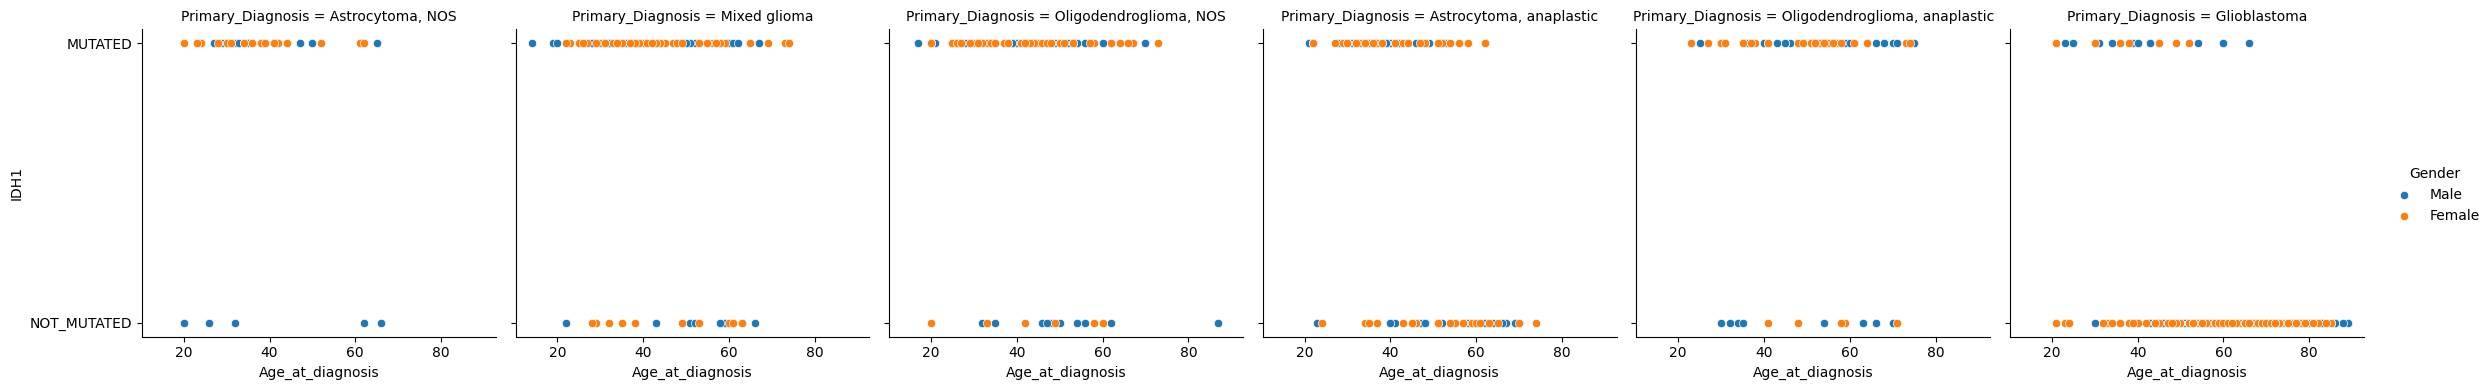

In [54]:
g = sns.FacetGrid(non_encoded_df, col='Primary_Diagnosis', hue='Gender', height=4)
g.map(sns.scatterplot, 'Age_at_diagnosis', 'IDH1')
g.add_legend()
plt.show()

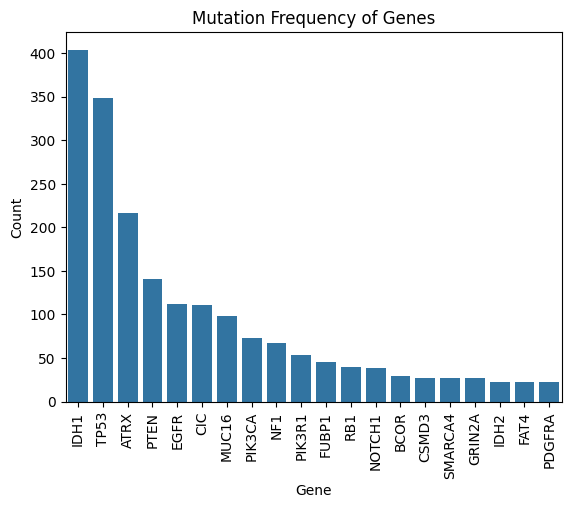

In [80]:
mutation_cols = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
mutation_counts = non_encoded_df[mutation_cols].apply(lambda x: x == 'MUTATED').sum().reset_index()
mutation_counts.columns = ['Gene', 'Count']

sns.barplot(data=mutation_counts, x='Gene', y='Count')
plt.title('Mutation Frequency of Genes')
plt.xticks(rotation=90)
plt.show()

In [81]:
non_encoded_df.nunique()

Unnamed: 0           839
Grade                  2
Gender                 2
Age_at_diagnosis      73
Primary_Diagnosis      6
IDH1                   2
TP53                   2
ATRX                   2
PTEN                   2
EGFR                   2
CIC                    2
MUC16                  2
PIK3CA                 2
NF1                    2
PIK3R1                 2
FUBP1                  2
RB1                    2
NOTCH1                 2
BCOR                   2
CSMD3                  2
SMARCA4                2
GRIN2A                 2
IDH2                   2
FAT4                   2
PDGFRA                 2
dtype: int64

In [82]:
encoded_df.nunique()

Unnamed: 0           839
Grade                  2
Gender                 2
Age_at_diagnosis     766
IDH1                   2
TP53                   2
ATRX                   2
PTEN                   2
EGFR                   2
CIC                    2
MUC16                  2
PIK3CA                 2
NF1                    2
PIK3R1                 2
FUBP1                  2
RB1                    2
NOTCH1                 2
BCOR                   2
CSMD3                  2
SMARCA4                2
GRIN2A                 2
IDH2                   2
FAT4                   2
PDGFRA                 2
Primary Diagnosis      6
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(non_encoded_df["Primary_Diagnosis"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Astrocytoma, NOS': np.int64(0), 'Astrocytoma, anaplastic': np.int64(1), 'Glioblastoma': np.int64(2), 'Mixed glioma': np.int64(3), 'Oligodendroglioma, NOS': np.int64(4), 'Oligodendroglioma, anaplastic': np.int64(5)}


In [84]:
encoded_df["Primary Diagnosis"] = le.fit_transform(non_encoded_df["Primary_Diagnosis"])

In [85]:
encoded_df.head()

,Unnamed: 0,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Primary Diagnosis
0,0,0,0,51.30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1,0,0,38.72,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2,2,0,0,35.17,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,32.78,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,0,0,31.51,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
encoded_df = encoded_df[['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN',
       'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1',
       'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA', 'Primary Diagnosis', "Grade"]]

In [90]:
encoded_df.head()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Primary Diagnosis,Grade
0,0,51.30,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,0
1,0,38.72,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2,0,35.17,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,31.51,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
# Writing the processed Data set to file
encoded_df.to_csv("./TCGA_InfoWithGrade.csv")
non_encoded_df.to_csv("./TCGA_GBM_LGG_Mutations_all.csv")

In [92]:
encoded_df.head()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Primary Diagnosis,Grade
0,0,51.30,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,0
1,0,38.72,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2,0,35.17,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,31.51,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
set(non_encoded_df['Primary_Diagnosis'])

{'Astrocytoma, NOS',
 'Astrocytoma, anaplastic',
 'Glioblastoma',
 'Mixed glioma',
 'Oligodendroglioma, NOS',
 'Oligodendroglioma, anaplastic'}